<img src="https://github.com/AmsterdamUMC/AmsterdamUMCdb/blob/master/img/logo_c4i_square.png?raw=1" alt="Logo C4I" width=128px/>

<img src="https://github.com/AmsterdamUMC/AmsterdamUMCdb/blob/master/img/logo_amds.png?raw=1" alt="Logo AMDS" width=128px/>

# AmsterdamUMCdb with Google BigQuery and Colaboratory
## AmsterdamUMCdb - Freely Accessible ICU Database
## Task 1: Feature selection for septic patients



<a name="cell-project-id"></a>
# Retrieving your Google Cloud Project ID
- At the top of the screen, select **My First Project** or [create a new one](https://console.cloud.google.com/projectcreate). Please write down the Project ID in the cell below ("Insert text here") and **Run** the cell to store the value.

In [1]:
# sets *your* project id
PROJECT_ID = "premium-episode-405909" #@param {type:"string"}

# Sets the default BigQuery dataset for accessing AmsterdamUMCdb

If you have received instructions to use a specific BigQuery instance, change the default settings here. Otherwise use these default values.

In [2]:
# sets default dataset for AmsterdamUMCdb
DATASET_PROJECT_ID = 'amsterdamumcdb' #@param {type:"string"}
DATASET_ID = 'version1_0_2' #@param {type:"string"}
LOCATION = 'eu' #@param {type:"string"}

# Provide your credentials to access the AmsterdamUMCdb dataset on Google BigQuery
Authenticate your credentials with Google Cloud Platform and set your default Google Cloud Project ID as an environment variable for running query jobs.

1. Run the cell. The `Allow this notebook to access your Google credentials?` prompt appears. Select `Allow`.
2. In the `Sign in - Google Accounts` dialog, use the account you registered during the AmsterdamUMCdb application process and select `Allow` again.

In [3]:
import os
from google.colab import auth

# all libraries check this environment variable, so set it:
os.environ["GOOGLE_CLOUD_PROJECT"] = PROJECT_ID

auth.authenticate_user()
print('Authenticated')

Authenticated


# Enable data table display

Colab includes the `google.colab.data_table` package that can be used to display Pandas dataframes as an interactive data table (default limits: `max_rows = 20000`, `max_columns = 20`). This is especially useful when exploring the  tables or dictionary from AmsterdamUMCdb. It can be enabled with:

In [4]:
%load_ext google.colab.data_table
from google.colab.data_table import DataTable

# change default limits:
DataTable.max_columns = 50
DataTable.max_rows = 30000


## Set the default query job configuration for magics

In [5]:
from google.cloud.bigquery import magics
from google.cloud import bigquery

# sets the default query job configuration
def_config = bigquery.job.QueryJobConfig(default_dataset=DATASET_PROJECT_ID + "." + DATASET_ID)
magics.context.default_query_job_config = def_config

In [6]:
import pandas as pd
config_gbq = {'query':
          {'defaultDataset': {
              "datasetId": DATASET_ID,
              "projectId": DATASET_PROJECT_ID
              },
           'Location': LOCATION}
           }

## Query the admission table and copy the data to the `admissions` Pandas dataframe:

The admissions table contains the ICU admissions of all patients in AmsterdamUMCdb. More information can be found here: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AmsterdamUMC/AmsterdamUMCdb/blob/master/tables/admissions.ipynb)

Since this is a relatively small table, it is acceptable to use `SELECT *`.

**Note**: Should an error occur while running the query, please see
the AmsterdamUMCdb BigQuery [Frequently Asked Questions](https://github.com/AmsterdamUMC/AmsterdamUMCdb/wiki/bigquery#faq).

In [7]:
%%bigquery admissions
SELECT * FROM admissions

Query is running:   0%|          |

Downloading:   0%|          |

## Display the `admissions` dataframe.

In [8]:
admissions

Output hidden; open in https://colab.research.google.com to view.

# Getting the data you need
The `amsterdamumcdb` package provides the `get_dictionary()` function that returns a DataFrame containing all `item`s and `itemid`s in AmsterdamUMCdb. In combination with BigQuery DataTables, it's possible to quickly locate an item of interest. Since AmsterdamUMCdb originated from a real Dutch ICU database, the original item names are in Dutch. For common ICU parameters, English translations have been provided as `item_en` and `category_en`. In addition, as part of the `ICUnity` project in preparation for the [The Dutch ICU Data Warehouse](https://www.icudata.nl/index-en.html) a number of commonly used items have been mapped to [LOINC](https://decor.nictiz.nl/art-decor/loinc), [SNOMED CT](https://decor.nictiz.nl/art-decor/snomed-ct) or [ATC](https://www.whocc.no/atc_ddd_index/) with data in the `vocabulary_id`, `vocabulary_concept_code`, `vocabulary_concept_name` columns. The mapping process is still very much work in progress, but we are happy to take [pull requests](https://github.com/AmsterdamUMC/AmsterdamUMCdb/pulls) for the [dictionary.csv](https://github.com/AmsterdamUMC/AmsterdamUMCdb/blob/master/amsterdamumcdb/dictionary/dictionary.csv) file, if you have any additions.

## Install the AmsterdamUMCdb package

In [8]:
# get the amsterdamumcdb package from PyPI repository for use in Colab
!pip install amsterdamumcdb --quiet
import amsterdamumcdb as adb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.5/273.5 kB 5.7 MB/s eta 0:00:00


## Load the AmsterdamUMCdb dictionary.
Use the **Filter** button to quickly browse through the dictionary.

In [10]:
dictionary = adb.get_dictionary()
dictionary

Output hidden; open in https://colab.research.google.com to view.

In [21]:
list_of_items_en = ['heart rate', 'non-invasive mean arterial pressure','oxygen saturation SpO2','hematocrit',
       'hemoglobin', 'white blood cell count', 'platelets','bilirubin total','serum creatinine',
       'lactate','respiratory rate spontaneous', 'sodium', 'potassium','skin temperature']

In [18]:
dictionary[dictionary['item_en']=='Glasgow Coma Score eye opening subscore']['item']

84      Actief openen van de ogen
85      Actief openen van de ogen
86      Actief openen van de ogen
87      Actief openen van de ogen
3596                        A_Eye
3597                        A_Eye
3598                        A_Eye
3599                        A_Eye
4133                       RA_Eye
4134                       RA_Eye
4135                       RA_Eye
5415                      MCA_Eye
5416                      MCA_Eye
5417                      MCA_Eye
5418                      MCA_Eye
8348             E_EMV_NICE_24uur
8349             E_EMV_NICE_24uur
8350             E_EMV_NICE_24uur
8351             E_EMV_NICE_24uur
8364            E_EMV_NICE_Opname
8365            E_EMV_NICE_Opname
8366            E_EMV_NICE_Opname
8367            E_EMV_NICE_Opname
Name: item, dtype: object

In [22]:
list_of_items = []
for item in list_of_items_en:
  temp_item = dictionary[dictionary['item_en']==item]['item']
  for item2 in temp_item:
    if item2 not in list_of_items:
      list_of_items.append(item2)
list_of_items

['Hartfrequentie',
 'Niet invasieve bloeddruk gemiddeld',
 'Saturatie (Monitor)',
 'Hematocriet',
 'Ht (bloed)',
 'Ht(v.Bgs) (bloed)',
 'Hemoglobine',
 'Hb (bloed)',
 'Leucocyten',
 "Leuco's (bloed)",
 'Thrombocyten',
 "Thrombo's (bloed)",
 'Bili Totaal',
 'Bilirubine (bloed)',
 'Kreatinine',
 'Kreatinine (bloed)',
 'KREAT enzym. (bloed)',
 'Laktaat',
 'Lactaat (bloed)',
 'Ademfrequentie Spontaan',
 'Frequentie Spontaan',
 'Ademfrequentie Spontaan(2)',
 'Ademfreq. Spontaan nieuw',
 'Natrium (bloed)',
 'Kalium (bloed)',
 'Temp Huid']

In [23]:
len(list_of_items)

26

# Selecting relevant features


In [9]:
septic_patients = adb.cohorts.get_sepsis_patients(config_gbq)
septic_patients

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
septic_patients.columns

Index(['patientid', 'admissionid', 'admissioncount', 'location', 'urgency',
       'origin', 'admittedat', 'admissionyeargroup', 'dischargedat',
       'lengthofstay', 'destination', 'gender', 'agegroup', 'dateofdeath',
       'weightgroup', 'weightsource', 'heightgroup', 'heightsource',
       'specialty', 'diagnosis_type', 'diagnosis', 'diagnosis_id',
       'diagnosis_subgroup', 'diagnosis_subgroup_id', 'diagnosis_group',
       'diagnosis_group_id', 'surgical', 'sepsis_at_admission',
       'sepsis_antibiotics_bool', 'sepsis_antibiotics_given',
       'other_antibiotics_bool', 'other_antibiotics_given',
       'sepsis_cultures_bool', 'sepsis_cultures_drawn',
       'sofa_respiration_score', 'sofa_coagulation_score', 'sofa_liver_score',
       'sofa_cardiovascular_score', 'sofa_cns_score', 'sofa_renal_score',
       'sofa_total_score'],
      dtype='object')

In [10]:
list_admission_ids = [str(id) for id in septic_patients["admissionid"].unique().tolist()]

query_config = {
    'query': {
        'parameterMode': 'NAMED',
        'queryParameters': [
            {
                'name': 'list_admission_ids',
                'parameterType': {'type': 'ARRAY',
                                  'arrayType': {'type': 'STRING'}},
                'parameterValue': {'arrayValues': [{'value': i} for i in list_admission_ids]}
            },
        ],
        'defaultDataset': {
              "datasetId": DATASET_ID,
              "projectId": DATASET_PROJECT_ID
              },
           'Location': LOCATION
    }
}

In [11]:
list_admission_ids = septic_patients[septic_patients['lengthofstay']<=720]['admissionid'].unique().tolist()

In [12]:
len(list_admission_ids) # 2810

2810

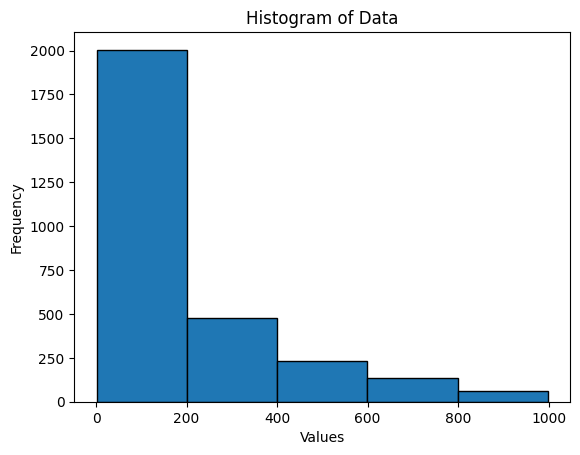

In [30]:
# destination of septic patients
import matplotlib.pyplot as plt

# Your list of data
hist_data = septic_patients[septic_patients['lengthofstay']<=1000]['lengthofstay'] #[septic_patients['destination']=='Overleden']

# Plotting the histogram
plt.hist(hist_data, bins=5, edgecolor='black')
plt.title('Histogram of Data')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [46]:
# Steroids drugs
drugs_table = pd.read_gbq(
    '''
    SELECT admissionid, start AS start_drug, stop AS stop_drug, duration AS duration_drug, action AS action_drug, dose AS dose_drug, fluidin AS fluid_in_drug
    FROM drugitems
    WHERE (LOWER(item) LIKE '%steroid%'
      OR LOWER(item) LIKE '%corti%'
      OR LOWER(ordercategory) LIKE '%steroid%'
      OR LOWER(ordercategory) LIKE '%corti%')
      AND (LOWER(item) NOT LIKE '%acetaat%')
      AND (LOWER(ordercategory) NOT LIKE '%acetaat%')
      AND CAST(admissionid AS STRING) IN UNNEST(@list_admission_ids)
    '''
    , configuration=query_config, use_bqstorage_api=True).sort_values("admissionid")
drugs_table

Output hidden; open in https://colab.research.google.com to view.

In [47]:
int_admission_ids = [int(number) for number in list_admission_ids]

In [13]:
# steroids, sepsis lab results
numericitems_table = pd.read_gbq(
    '''
    SELECT admissionid, value AS value_numericitem, item AS item_numericitem, unit AS unit_numericitem, measuredat AS measuredat_numericitem, updatedat AS updatedat_numericitem, fluidout AS fluidout_numericitem
    FROM numericitems
    WHERE CAST(admissionid AS STRING) IN UNNEST(@list_admission_ids)
    '''
    , configuration=query_config, use_bqstorage_api=True).sort_values("admissionid")
numericitems_table

,admissionid,value_numericitem,item_numericitem,unit_numericitem,measuredat_numericitem,updatedat_numericitem,fluidout_numericitem
6748486,11,-100.00,PD2 min ingesteld,mmHg,54240000,54660000,<NA>
19255925,11,7.80,Hb (bloed),mmol/l,-6540000,139340,<NA>
593818,11,88.00,Veneuze druk braun,mmHg,97440000,102900000,<NA>
10550232,11,0.59,Insp. Time (sec) nieuw,sec,39840000,40800000,<NA>
10834308,11,200.00,TMP max ingesteld,mmHg,79440000,80760000,<NA>
...,...,...,...,...,...,...,...
7859474,23540,75.00,UrineCAD,ml,149820000,150675677,75
9961841,23540,13.00,SBI (Zwakke ademhalingsindex),Geen,139020000,142140000,<NA>
8864821,23540,11.00,Mean luchtweg druk,cmH2O,121020000,121620000,<NA>
11665739,23540,50.00,MaagRetNietWeg,ml,128220000,128893840,<NA>


In [14]:
numericitems_table[numericitems_table['admissionid']==99].sort_values("measuredat_numericitem")

,admissionid,value_numericitem,item_numericitem,unit_numericitem,measuredat_numericitem,updatedat_numericitem,fluidout_numericitem
491254,99,3.06,Prothrombinetijd (bloed),INR,63537960000,64553427023,<NA>
12921069,99,2.23,Prothrombinetijd (bloed),INR,64137240000,64553435943,<NA>
18242771,99,5.70,Kalium (bloed),mmol/l,64137540000,64553442396,<NA>
2443985,99,623.00,Kreatinine (bloed),µmol/l,64519920000,64553621723,<NA>
18214944,99,336.00,Thrombo's (bloed),10^9/l,64519920000,64553620710,<NA>
...,...,...,...,...,...,...,...
18799206,99,45.00,Niet invasieve bloeddruk diastolisch,mmHg,64563720000,64565760000,<NA>
5134665,99,89.00,Hartfrequentie,/min,64566420000,64567320000,<NA>
8572211,99,25.00,Niet invasieve bloeddruk diastolisch,mmHg,64567260000,64567320000,<NA>
11271379,99,62.00,Niet invasieve bloeddruk gemiddeld,mmHg,64567260000,64567320000,<NA>


In [ ]:
listitem_table = pd.read_gbq(
    '''
    SELECT admissionid, value AS value_listitem, item AS item_listitem, measuredat AS measuredat_listitem, updatedat AS updatedat_listitem
    FROM listitems
    WHERE CAST(admissionid AS STRING) IN UNNEST(@list_admission_ids)
    '''
    , configuration=query_config, use_bqstorage_api=True).sort_values("admissionid")


# Final table join

## Table for each patient

In [40]:
list_of_items = [
 'Ht (bloed)',
 'Ht(v.Bgs) (bloed)',
 'Hemoglobine',
 'Hb (bloed)',
 'Leucocyten',
 "Leuco's (bloed)",
 'Thrombocyten',
 "Thrombo's (bloed)",
 'Bili Totaal',
 'Bilirubine (bloed)',
 'Kreatinine',
 'Kreatinine (bloed)',
 'Laktaat',
 'Lactaat (bloed)',
 'Ademfrequentie Spontaan',
 'Natrium (bloed)',
 'Kalium (bloed)']

In [59]:
supplement_items = ['Hartfrequentie', 'Saturatie (Monitor)']

In [48]:
dic = {}
for item in list_of_items:
  num = numericitems_table[(numericitems_table['admissionid'].isin(int_admission_ids)) & (numericitems_table['item_numericitem'] == item)].shape[0]
  dic[item] = num
print(dic)

{'Ht (bloed)': 34068, 'Ht(v.Bgs) (bloed)': 84166, 'Hemoglobine': 1329, 'Hb (bloed)': 36950, 'Leucocyten': 1227, "Leuco's (bloed)": 34217, 'Thrombocyten': 1265, "Thrombo's (bloed)": 35225, 'Bili Totaal': 427, 'Bilirubine (bloed)': 12808, 'Kreatinine': 1217, 'Kreatinine (bloed)': 35336, 'Laktaat': 391, 'Lactaat (bloed)': 28948, 'Ademfrequentie Spontaan': 6283, 'Natrium (bloed)': 40373, 'Kalium (bloed)': 39710}


In [49]:
df_in_list = numericitems_table[(numericitems_table['admissionid'].isin(int_admission_ids)) & (numericitems_table['item_numericitem'].isin(list_of_items))]

In [52]:
df_in_list[df_in_list['admissionid']==11]

,admissionid,value_numericitem,item_numericitem,unit_numericitem,measuredat_numericitem,updatedat_numericitem,fluidout_numericitem
16918862,11,337.00,Kreatinine (bloed),µmol/l,29400000,34173580,<NA>
5876356,11,4.70,Lactaat (bloed),mmol/l,72240000,75096150,<NA>
12682852,11,144.00,Natrium (bloed),mmol/l,116520000,121498543,<NA>
16263416,11,0.34,Ht(v.Bgs) (bloed),Geen,86640000,85602900,<NA>
10920053,11,0.27,Ht(v.Bgs) (bloed),Geen,5040000,6226040,<NA>
...,...,...,...,...,...,...,...
2432458,11,6.00,Hb (bloed),mmol/l,29400000,29851440,<NA>
19189083,11,0.30,Ht(v.Bgs) (bloed),Geen,25440000,25758290,<NA>
15875410,11,0.32,Ht(v.Bgs) (bloed),Geen,54240000,55892470,<NA>
16471977,11,0.28,Ht(v.Bgs) (bloed),Geen,11040000,11717150,<NA>


In [57]:
import numpy as np

TIME_INTERVAL = '1H'
# TODO change the following features
NUMERIC_FEATURES = ['Thrombo\'s (bloed)', 'Thrombocyten', 'Thrombo\'s citr. bloed (bloed)', 'Thrombo CD61 (bloed)', 'Lactaat (bloed)', 'Laktaat', 'Laktaat Astrup', 'Bilirubine (bloed)']
# LIST_FEATURES = listitem_table['item_listitem'].unique()[:5]
# ADMISSION_FEATURES = ['admissionid', 'urgency', 'gender', 'agegroup', 'dateofdeath', 'weightgroup', 'heightgroup']

### numericitems

In [108]:
from google.colab import files
def get_numeric_dataframe(table, time_interval, features, septic_patients):

  '''
  table: dataframe for numeric items
  time_interval: interval between two timestamps, should be defined externally
  features: pre-selected item names list
  '''

  df_numeric = pd.DataFrame()
  count=0

  for id in int_admission_ids:

    # discard date<0
    table = table[table['measuredat_numericitem'] >= 0]

    timestamps = np.sort(table[(table['admissionid']==id) & (table['item_numericitem'].isin(features))]['measuredat_numericitem'].unique()).tolist()
    admittedat = septic_patients.loc[septic_patients['admissionid']==id].iloc[-1]['admittedat']
    timestamp_list = [t for t in timestamps if t >= admittedat]
    timestamp_list.insert(0, admittedat)
    merged_df = pd.DataFrame({'timestamp': timestamp_list})

    for item in features:
      measure_item_id = table[(table['admissionid']==id) & (table['item_numericitem']==item)].loc[:, ['measuredat_numericitem','value_numericitem']].sort_values(by='measuredat_numericitem')
      measure_item_id.rename(columns={'value_numericitem': item, 'measuredat_numericitem': 'timestamp'}, inplace=True)
      merged_df = pd.merge(merged_df, measure_item_id, on='timestamp', how='left') # 2 cols: timestamp + value (for one admission one item)

    merged_df.insert(0, 'admissionid', id) # timestamp + one column per feature, adding admissionid
    merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'], unit='ms') # convert timestamp to datetime format

    # df_numeric = pd.concat([df_numeric, merged_df]) # take it back without saving
    count += 1

    df_numeric = pd.concat([df_numeric, merged_df]) # delete without saving
    # change this line if want 3D data
  # df_numeric = df_numeric.set_index('timestamp').groupby('admissionid').resample(time_interval).last().fillna(method='ffill') # .max(), .mean(), .mode()


  return df_numeric


In [ ]:
df_numeric = get_numeric_dataframe(df_in_list, TIME_INTERVAL, list_of_items, septic_patients)

In [110]:
df_supplement = numericitems_table[(numericitems_table['admissionid'].isin(int_admission_ids)) & (numericitems_table['item_numericitem'].isin(supplement_items))]

In [ ]:
df_numeric = get_numeric_dataframe(df_supplement, TIME_INTERVAL, supplement_items, septic_patients)

In [113]:
IMPUTE_COLUMNS = {'Ht(v.Bgs) (bloed)':'Ht (bloed)',
                  'Hb (bloed)':'Hemoglobine',
                  'Leuco\'s (bloed)':'Leucocyten',
                  'Thrombo\'s (bloed)':'Thrombocyten',
                  'Bilirubine (bloed)':'Bili Totaal',
                  'Kreatinine (bloed)':'Kreatinine',
                  'Lactaat (bloed)':'Laktaat'
          }

In [114]:
for col1, col2 in IMPUTE_COLUMNS.items():
  print(df_numeric[col1].isna().sum())
  df_numeric[col1] = df_numeric[col1].fillna(df_numeric[col2])
  df_numeric = df_numeric.drop([col2], axis=1)
  print(df_numeric[col1].isna().sum())
df_numeric

43769
20119
95323
94106
97288
96169
95798
94646
113329
112937
96726
95616
97753
97397


,admissionid,timestamp,Ht(v.Bgs) (bloed),Hb (bloed),Leuco's (bloed),Thrombo's (bloed),Bilirubine (bloed),Kreatinine (bloed),Lactaat (bloed),Ademfrequentie Spontaan,Natrium (bloed),Kalium (bloed)
0,11,1970-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11,1970-01-01 01:07:00,0.28,6.0,8.9,127.0,17.0,350.0,5.9,NaN,136.0,3.9
2,11,1970-01-01 01:24:00,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11,1970-01-01 03:04:00,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,1970-01-01 04:04:00,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
123465,23535,1970-01-07 00:51:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.0,5.0
123466,23535,1970-01-07 17:43:00,0.32,6.4,5.4,261.0,NaN,130.0,NaN,NaN,149.0,4.6
123467,23535,1970-01-07 23:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151.0,4.6
123468,23535,1970-01-08 03:33:00,0.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
df_numeric[df_numeric['admissionid']==47]

,admissionid,timestamp,Ht(v.Bgs) (bloed),Hb (bloed),Leuco's (bloed),Thrombo's (bloed),Bilirubine (bloed),Kreatinine (bloed),Lactaat (bloed),Ademfrequentie Spontaan,Natrium (bloed),Kalium (bloed)
110,47,1970-01-02 22:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,47,1970-01-02 22:30:00,0.30,NaN,NaN,NaN,NaN,NaN,2.6,NaN,NaN,NaN
112,47,1970-01-02 22:50:00,NaN,NaN,NaN,120.0,NaN,NaN,NaN,NaN,NaN,NaN
113,47,1970-01-03 00:08:00,0.33,NaN,NaN,NaN,NaN,NaN,2.8,NaN,NaN,NaN
114,47,1970-01-03 00:31:00,NaN,6.8,15.3,208.0,14.0,80.0,NaN,NaN,NaN,NaN
115,47,1970-01-03 03:21:00,0.35,NaN,NaN,NaN,NaN,NaN,3.6,NaN,NaN,NaN
116,47,1970-01-03 06:22:00,0.33,NaN,NaN,NaN,NaN,NaN,4.4,NaN,NaN,NaN
117,47,1970-01-03 06:31:00,0.33,6.8,14.5,254.0,NaN,106.0,NaN,NaN,138.0,4.8
118,47,1970-01-03 09:32:00,0.30,NaN,NaN,NaN,NaN,NaN,4.2,NaN,NaN,NaN
119,47,1970-01-03 15:10:00,0.28,NaN,NaN,NaN,NaN,NaN,3.2,NaN,NaN,NaN


In [116]:
df_numeric = pd.merge_ordered(df_numeric, df_supplement, on=['admissionid','timestamp'], fill_method='ffill', how='left')

In [117]:
df_numeric

,admissionid,timestamp,Ht(v.Bgs) (bloed),Hb (bloed),Leuco's (bloed),Thrombo's (bloed),Bilirubine (bloed),Kreatinine (bloed),Lactaat (bloed),Ademfrequentie Spontaan,Natrium (bloed),Kalium (bloed),Hartfrequentie,Saturatie (Monitor)
0,11,1970-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11,1970-01-01 01:07:00,0.28,6.0,8.9,127.0,17.0,350.0,5.9,NaN,136.0,3.9,NaN,NaN
2,11,1970-01-01 01:24:00,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143.0,NaN
3,11,1970-01-01 03:04:00,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.0,NaN
4,11,1970-01-01 04:04:00,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123553,23535,1970-01-07 00:51:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.0,5.0,109.0,96.0
123554,23535,1970-01-07 17:43:00,0.32,6.4,5.4,261.0,NaN,130.0,NaN,NaN,149.0,4.6,121.0,97.0
123555,23535,1970-01-07 23:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151.0,4.6,121.0,97.0
123556,23535,1970-01-08 03:33:00,0.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.0,97.0


In [126]:
df_numeric['timestamp'] = pd.to_datetime(df_numeric['timestamp'])
df_numeric = df_numeric.set_index('timestamp').groupby('admissionid').resample('1H').last().fillna(method='ffill').drop(columns=['admissionid']).reset_index()
df_numeric = df_numeric.set_index('timestamp').groupby('admissionid').resample('8H').last().fillna(method='ffill').fillna(method='bfill').drop(columns=['admissionid']).reset_index()
first_admission = df_numeric.groupby('admissionid')['timestamp'].min().reset_index()
first_admission.columns = ['admissionid','first_admission']
df = pd.merge(df_numeric, first_admission, on='admissionid', how='left')
df['time'] = df['timestamp']-df['first_admission']
df_numeric['timestamp'] = df['time'].dt.total_seconds()//3600

In [81]:
df_numeric[df_numeric['admissionid']==47]

,admissionid,timestamp,Ht(v.Bgs) (bloed),Hb (bloed),Leuco's (bloed),Thrombo's (bloed),Bilirubine (bloed),Kreatinine (bloed),Lactaat (bloed),Ademfrequentie Spontaan,Natrium (bloed),Kalium (bloed),Hartfrequentie,Saturatie (Monitor)
106,47,1970-01-01 06:06:00,0.31,6.3,12.9,119.0,NaN,73.0,NaN,NaN,141.0,4.3,94.0,NaN
107,47,1970-01-01 15:39:00,0.28,NaN,NaN,NaN,NaN,NaN,2.8,NaN,NaN,NaN,94.0,NaN
108,47,1970-01-02 06:05:00,0.27,5.7,8.5,83.0,8.0,64.0,NaN,NaN,139.0,4.0,94.0,NaN
109,47,1970-01-02 22:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,47,1970-01-02 22:30:00,0.30,NaN,NaN,NaN,NaN,NaN,2.6,NaN,NaN,NaN,NaN,NaN
111,47,1970-01-02 22:50:00,NaN,NaN,NaN,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,47,1970-01-03 00:08:00,0.33,NaN,NaN,NaN,NaN,NaN,2.8,NaN,NaN,NaN,NaN,NaN
113,47,1970-01-03 00:31:00,NaN,6.8,15.3,208.0,14.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN
114,47,1970-01-03 03:21:00,0.35,NaN,NaN,NaN,NaN,NaN,3.6,NaN,NaN,NaN,NaN,NaN
115,47,1970-01-03 06:22:00,0.33,NaN,NaN,NaN,NaN,NaN,4.4,NaN,NaN,NaN,NaN,NaN


# Labels (mortality)
after complete dataset

In [ ]:
# labels for training and testing
labels_list = []
for id in np.sort(complete_data['admissionid'].unique()).tolist():
  if septic_patients[septic_patients['admissionid'] == id]['destination']=='Overleden':
    labels_list.append(1)
  else:
    labels_list.append(0)
labels = pd.DataFrame({'admissionid':np.sort(complete_data['admissionid'].unique()), 'label':labels_list})

In [ ]:
# labels' timestamps for LSTM SHAP
# use the last timestamp as the time of death
label_time_list = []
for id in np.sort(complete_data['admissionid'].unique()).tolist():
  label_time_list.append(complete_data[complete_data['admissionid']==id]['time'][-1])

## Capping, Normalization

In [ ]:
# Impute possible remaining missing values

column_name = list(X.columns)[1:]
for feature in column_name:
  # X.loc[X[feature].isnull(), feature] = X.icustay_id.map(fast_mode(X, ['icustay_id'], feature).set_index('icustay_id')[feature])
  X.loc[:,feature] = X.loc[:,feature].fillna(method='ffill')

In [ ]:
# Capping outliers

cap_mask = X.columns.difference(['admissionid', 'timestamp', 'dose'])
cap_mask = NUMERIC_FEATURES
X[cap_mask] = X[cap_mask].clip(X[cap_mask].quantile(0.01), X[cap_mask].quantile(0.99), axis=1)

In [ ]:
# Normalize into [0,1]

norm_mask = NUMERIC_FEATURES
X[norm_mask] = (X[norm_mask] - X[norm_mask].min()) / (X[norm_mask].max() - X[norm_mask].min())

## Train-test split

In [ ]:
from sklearn.model_selection import train_test_split

id_list = list(X['admissionid'].unique())
SPLIT_SIZE = 0.2

In [ ]:
id_train, id_test_val = train_test_split(id_list, test_size = SPLIT_SIZE, random_state = 42) # train set is 80%)
print("train is %d" % len(id_train))
# remaining 20% split in halves as test and validation 10% and 10%
id_valid, id_test = train_test_split(id_test_val, test_size = 0.5, random_state = 42) # test 10% valid 10%
print("val and test are %d" %len(id_test))

In [ ]:
train = X[X.admissionid.isin(id_train)].sort_values(by=['admissionid'])
test = X[X.admissionid.isin(id_test)].sort_values(by=['admissionid'], ignore_index = True)
validation = X[X.admissionid.isin(id_valid)].sort_values(by=['admissionid'])

test = test.sort_values(by=['admissionid', 'timestamp'], ignore_index = True)
train = train.sort_values(by=['admissionid', 'timestamp'], ignore_index = True)
validation = validation.sort_values(by=['admissionid', 'timestamp'], ignore_index = True)